In [1]:
# 아래 코드를 기반으로 자유롭게 수정.
# reward_matrix 형태 수정 금지.
# 강화학습 관련 패키지, 라이브러리, 함수 사용 금지 (예. OpenAI Gym)

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#state = 0
class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return

    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self, Q, epsilon, state):
        direction = np.arange(N)
        # 행동을 결정
        if np.random.rand() < epsilon: # 확률 e로 무작위 행동을 선택함
            action = np.random.randint(3, size=(1))
        else:
            action = direction[np.argmax(Q[:,0])]
            #print(action)
        return action
    
    def get_s_next(self, state, action):
        direction = np.arange(N)
        next_direction = direction[action]  # 행동 a의 방향
        s_next = next_direction
        
        return s_next

In [3]:
def Q_learning(state, action, s_next, reward, Q, eta, gamma=1): # 이거 수정(action의 정보가 빠짐)
    if reward is 1:
        Q[state, 0] = Q[state, 0] + eta * (1 - Q[state, 0])
    else:
        Q[state, 0] = Q[state, 0] + eta * (0 + gamma + np.max(Q[s_next, 0]) - Q[state, 0])
    return Q

In [4]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정
# 줄은 상태, 열은 행동을 나타낸다
theta_0 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])

In [5]:
# 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수
def simple_convert_into_pi_from_theta(theta):
    '''단순 비율 계산'''

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 비율 계산

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

# 무작위 행동정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


In [6]:
# 행동가치 함수 Q의 초기 상태
[a, b] = theta_0.shape  # # 열과 행의 갯수를 변수 a, b에 저장
Q = np.random.rand(a, b) * theta_0 * 0.1 # * theta0 로 요소 단위 곱셈을 수행, Q에서 벽 방향으로 이동하는 행동에는 nan을 부여
print(Q)

[[6.46787138e-02 2.87692166e-02 1.95124319e-02]
 [2.83927001e-02 6.70085176e-02 9.05668664e-03]
 [3.47048123e-05 5.14531251e-02 5.71845119e-02]]


In [7]:
def test_algorithm(algo, reward_matrix, epsilon, eta):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    statelist = np.arange(N) # 초기상태 리스트
    
    for sim in range(num_sims):
        #Q_metric = np.random.rand(N,T,num_sims) * reward_matrix * 0.1
        #print(Q_metric.shape)
        #Q = Q_metric[:,0]
        print(Q.shape)
        state = statelist[0] # 초기상태 지정
        
        for t in range(T):
            chosen_ad = algo.select_ad(Q, epsilon, state) #액션
            reward = reward_matrix[chosen_ad,t,sim] #보상 스칼라
            s_next = algo.get_s_next(state, chosen_ad) # 다음 상태 정보
            #print(reward_matrix[:,1,0].shape)
            #print(reward_matrix[:,1,0])
            
            Q = Q_learning(state, chosen_ad, s_next, reward, Q, eta) # 이 줄도 수정
            #print(Q)
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward

    return cumulative_rewards

In [8]:
# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
## 파라미터 수정
N = 3
T = 3000
num_sims = 2
epsilon = 0.3
eta = 1e-03

reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix, epsilon, eta)
print(results[:,T-1])


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

UnboundLocalError: local variable 'Q' referenced before assignment

[1684. 1919.]


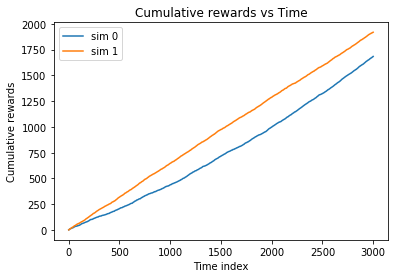

In [6]:
# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
## 파라미터 수정
N = 3
T = 3000
num_sims = 2
epsilon = 0.7
eta = 1e-03

reward_matrix = np.zeros((N,T,num_sims)) # 초기 보상 텐서
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]


# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix, epsilon, eta)
print(results[:,T-1])


# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))

plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()

[1771. 1747.]


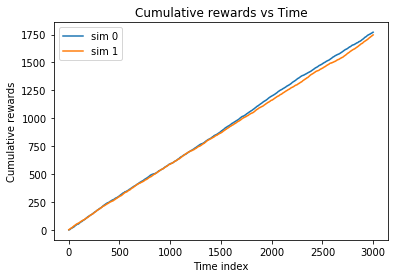

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

class adSelector():
    def __init__(self, reward_matrix, values):
        self.N = reward_matrix.shape[0]
        self.T = reward_matrix.shape[1]
        self.num_sims = reward_matrix.shape[2]
        return
    # 아래 함수를 수정. 필요한 경우 input 인자 등을 추가.
    def select_ad(self):
        return random.randrange(N)

def test_algorithm(algo, reward_matrix):
    N = reward_matrix.shape[0]
    T = reward_matrix.shape[1]
    num_sims = reward_matrix.shape[2]
    cumulative_rewards = np.zeros((num_sims,T))
    for sim in range(num_sims):
        for t in range(T):
            chosen_ad = algo.select_ad()
            reward = reward_matrix[chosen_ad,t,sim]
            if t == 0:
                cumulative_rewards[sim,t] = reward
            else:
                cumulative_rewards[sim,t] = cumulative_rewards[sim,t-1] + reward
    #print(cumulative_rewards)
    return cumulative_rewards

# 훈련집합 (Training set) 생성. 이 부분은 테스트집합으로 변경하여 테스트할 것임.  
N = 3
T = 3000
num_sims = 2
reward_matrix = np.zeros((N,T,num_sims))
random.seed(0)
for sim in range(num_sims):
    shuffled_index = np.random.permutation(N)
    reward_matrix[shuffled_index[0],:,sim] = [np.random.binomial(1, p=i/T) for i in range(T)]
    reward_matrix[shuffled_index[1],:,sim] = [np.random.binomial(1, p=1-i/T) for i in range(T)]
    reward_matrix[shuffled_index[2],:,sim] = [np.random.binomial(1, p=3/4) for i in range(T)]
# 학습 알고리즘 테스트.
algo = adSelector(reward_matrix,[])
results = test_algorithm(algo, reward_matrix)
print(results[:,T-1])
#print(results)
# 학습 결과를 그래프로 출력.
for i in range(num_sims):
    plt.plot(range(1,T+1), results[i,:], label="sim {}".format(i))
plt.plot()
plt.xlabel("Time index")
plt.ylabel("Cumulative rewards")
plt.title("Cumulative rewards vs Time")
plt.legend()
plt.show()